In [ ]:
!pip install tf-explain

     |████████████████████████████████| 51kB 4.8MB/s 


In [ ]:
import cv2
import os
import math
import pylab
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from tf_explain.core.grad_cam import GradCAM
from random import choice

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.99:
            # print('inside if')
            self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor="val_accuracy", 
    patience=20,
    mode="auto",
    min_delta=0
)

filepath = '/content/drive/MyDrive/ModelResults/improv-custom-model-realworldaug.h5'
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    mode='max'
)

callback = MyCallback()

In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld'
train_path = os.path.join(dataset_path, 'Train')
validate_path = os.path.join(dataset_path, 'Validation')
batch_size = 64

# Training
train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_datagenerator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size
)

# Validation
validate_datagen = ImageDataGenerator(
    rescale=1./255,
)

validate_datagenerator = validate_datagen.flow_from_directory(
    validate_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size
)


Found 3348 images belonging to 12 classes.
Found 1026 images belonging to 12 classes.


In [ ]:
model = Sequential([
    Conv2D(64, (7, 7), input_shape=(224, 224, 3), strides=2, name='block1_conv1'),
    MaxPool2D((3, 3), strides=2),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv1', padding='same'),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv2', padding='same'),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv3', padding='same'),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv4', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv1', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv2', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv3', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv4', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv5', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv6', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv1', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv2', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv3', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv4', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv5', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv6', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv1', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv2', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv3', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv4', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv5', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv6', padding='same'),
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(12, activation='softmax'),  
])

In [ ]:
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_datagenerator, 
    epochs=500, 
    steps_per_epoch=len(train_datagenerator), 
    validation_data=validate_datagenerator,
    validation_steps=len(validate_datagenerator),
    callbacks=[callback, early_stopping, checkpoint]
)

Epoch 1/500
53/53 [==============================] - 93s 2s/step - loss: 2.4157 - accuracy: 0.1960 - val_loss: 2.3877 - val_accuracy: 0.1988
Epoch 2/500
53/53 [==============================] - 90s 2s/step - loss: 2.3353 - accuracy: 0.2101 - val_loss: 2.3094 - val_accuracy: 0.1988
Epoch 3/500
53/53 [==============================] - 90s 2s/step - loss: 2.2487 - accuracy: 0.2430 - val_loss: 2.1156 - val_accuracy: 0.3109
Epoch 4/500
53/53 [==============================] - 91s 2s/step - loss: 2.0036 - accuracy: 0.3563 - val_loss: 1.9889 - val_accuracy: 0.3031
Epoch 5/500
53/53 [==============================] - 90s 2s/step - loss: 1.8834 - accuracy: 0.3617 - val_loss: 1.9698 - val_accuracy: 0.3294
Epoch 6/500
53/53 [==============================] - 91s 2s/step - loss: 1.8660 - accuracy: 0.3780 - val_loss: 1.9422 - val_accuracy: 0.3548
Epoch 7/500
53/53 [==============================] - 92s 2s/step - loss: 1.8904 - accuracy: 0.3813 - val_loss: 1.8742 - val_accuracy: 0.3548
Epoch 8/500
5

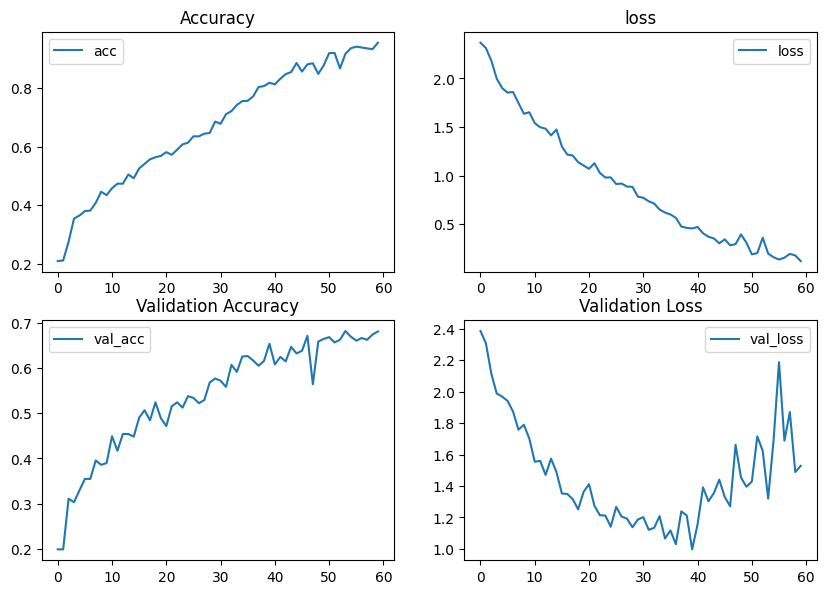

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
x = range(len(acc))

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, acc, label='acc')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(x, loss, label='loss')
axs[0, 1].set_title('loss')
axs[0, 1].legend()

axs[1, 0].plot(x, val_acc, label='val_acc')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(x, val_loss, label='val_loss')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].legend()
plt.show()

In [ ]:
model = load_model(filepath)

In [ ]:
test_data_path = os.path.join(dataset_path, 'Test')
 
test_datagen = ImageDataGenerator(
    rescale=1./255,
)
test_datagenerator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 721 images belonging to 12 classes.


In [ ]:
predictions = model.evaluate(test_datagenerator)
print('Loss:', round(predictions[0], 4))
print('Accuracy:', round(predictions[1], 4))

12/12 [==============================] - 459s 42s/step - loss: 1.3341 - accuracy: 0.7171
Loss: 1.3341
Accuracy: 0.7171


In [ ]:
classes = {v: k for k, v in test_datagenerator.class_indices.items()}

In [ ]:
conv_layers = [layer.name for layer in model.layers if layer.name.__contains__('conv')]

In [ ]:
gradcam = GradCAM()

In [ ]:
class_path = os.path.join(test_data_path, choice(os.listdir(test_data_path)))
image_path = os.path.join(class_path, choice(os.listdir(class_path)))
print(f"Class Name: {class_path.split('/')[-1]} | File Name: {image_path.split('/')[-1]}")

image = load_img(image_path, target_size=(224, 224))
image_a = img_to_array(image)
image_p = image_a.reshape((1, image_a.shape[0], image_a.shape[1], image_a.shape[2]))
yhat = np.argmax(model.predict(image_p))
# ans = classes[yhat]
# print('Class Predicted:', ans)

Class Name: Alt+miner | File Name: Am_0_8934.jpeg


In [ ]:
# cv2_imshow(image_a)

total = len(conv_layers)
columns = 5
rows = total // columns
remaining = total - rows * columns
print(f"Total: {total} | Columns: {columns} | Rows: {rows} | Remaining: {remaining}")

img = tf.keras.applications.xception.preprocess_input(img_to_array(image))
# img = img_to_array(image)

sns.set()
if remaining > 0:
    fig, axs = plt.subplots(rows + 1, columns, constrained_layout=True, figsize=(16, 16))
else:
    fig, axs = plt.subplots(rows, columns, constrained_layout=True, figsize=(16, 16))

i = 0
j = 0
for layer_name in conv_layers:
    # print(i, j, end='\t')
    axs[i, j].imshow(gradcam.explain(([img], None), model, yhat, layer_name))
    axs[i, j].set_title(layer_name)
    j += 1
    if j % columns == 0:
        j = 0
        i += 1
        # print()

# plt.imshow(gradcam.explain(([img], None), model, yhat, conv_layers[11]))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [ ]:
target_names = []

for key in test_datagenerator.class_indices:
    target_names.append(key)

In [ ]:
Y_pred = model.predict(test_datagenerator)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
print(confusion_matrix(test_datagenerator.classes, y_pred))

[[13  2 10  5  2  1  2  8  4  7  1 24]
 [ 1  1  2  5  1  1  0  1  3  4  0  5]
 [ 8  1  8  8  0  5  2  1  1  5  3 23]
 [ 5  0  7  3  3 12  4  2  2  4  3 19]
 [ 1  0  4  0  0  1  0  0  1  0  2  9]
 [ 7  0  2  2  3  2  3  3  4  4  1  7]
 [ 4  1  5  2  2  0  2  4  3  3  1  9]
 [ 3  0  4  3  1  0  1  6  4  2  0 17]
 [ 7  0  6  3  2  1  1  3  5  5  3 12]
 [ 4  1  9  4  0  3  1  5  6  5  0 13]
 [ 1  0  6  3  2  2  0  1  3  3  2 14]
 [23  8 22 18  3 12 13 11 11 22  8 69]]


In [ ]:
print('Classification Report')
print(classification_report(test_datagenerator.classes, y_pred, target_names=target_names))

Classification Report
                    precision    recall  f1-score   support

         Alt+miner       0.17      0.16      0.17        79
            B-wilt       0.07      0.04      0.05        24
               BLF       0.09      0.12      0.11        65
          E-blight       0.05      0.05      0.05        64
          L blight       0.00      0.00      0.00        18
           healthy       0.05      0.05      0.05        38
            insect       0.07      0.06      0.06        36
        leaf-miner       0.13      0.15      0.14        41
            mosaic       0.11      0.10      0.11        48
            physio       0.08      0.10      0.09        51
    powdery mildew       0.08      0.05      0.07        37
septoria leaf spot       0.31      0.31      0.31       220

          accuracy                           0.16       721
         macro avg       0.10      0.10      0.10       721
      weighted avg       0.16      0.16      0.16       721



In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


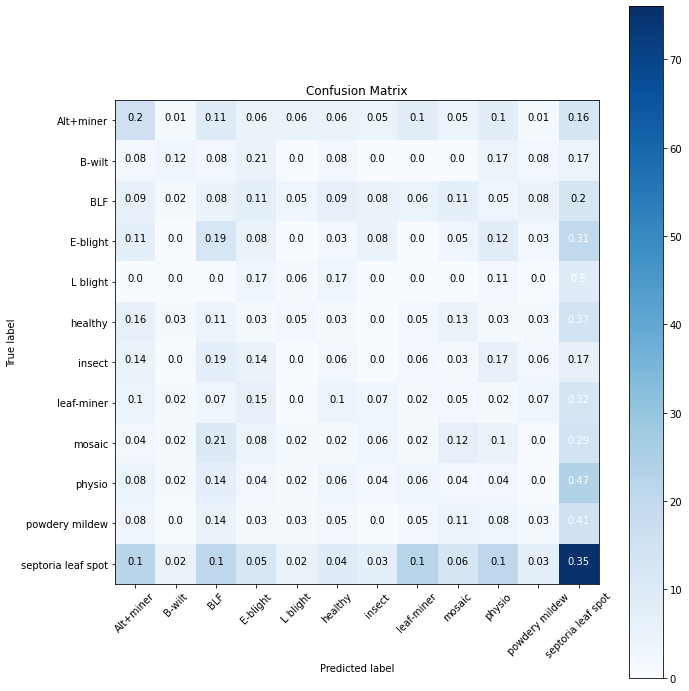

In [ ]:
Y_pred = model.predict(test_datagenerator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_datagenerator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')